# Exploratory Data Analysis of graph data

**Libraries**

1. NetworkX: https://networkx.org/
2. scikit-network: https://scikit-network.readthedocs.io/en/latest/

In [1]:
# Load modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})

import networkx as nx

In [2]:
%%bash
cd ../input
ls

collins.csv
ex.csv
ex_header.csv
gemsec_facebook_dataset


In [3]:
# TODO
# - Create synthetic datasets or Find an undirected graph
# - Plot graph, degrees distribution, edge prob distributions
# - Find central nodes

## Datasets

You are free to use any **probabilistic graph** available. A small dataset will be given. However, since not many
real-life probabilistic networks are publicly available, you may work use synthetic datasets as follows: you
may take any undirected network and simply assign probabilities to the edges by using a probability
distribution such as uniform, normal, power-law, etc.

Two excellent repositories for graph data are:
1. http://snap.stanford.edu/data/index.html
2. http://networkrepository.com/

**Graph Embedding with Self Clustering: Facebook** 

http://snap.stanford.edu/data/gemsec-Facebook.html

# Collins

In [5]:
# Load datasets
collins_df = pd.read_csv("../input/collins.csv",header=None)

In [6]:
collins_df.columns = ["src","dst", "probability"]

In [7]:
collins_df.head(6)

,src,dst,probability
0,0,1,0.983749
1,0,2,0.983363
2,0,3,0.952126
3,0,4,0.990000
4,0,5,0.948626
5,6,7,0.896235


In [8]:
collins_df.shape

(9074, 3)

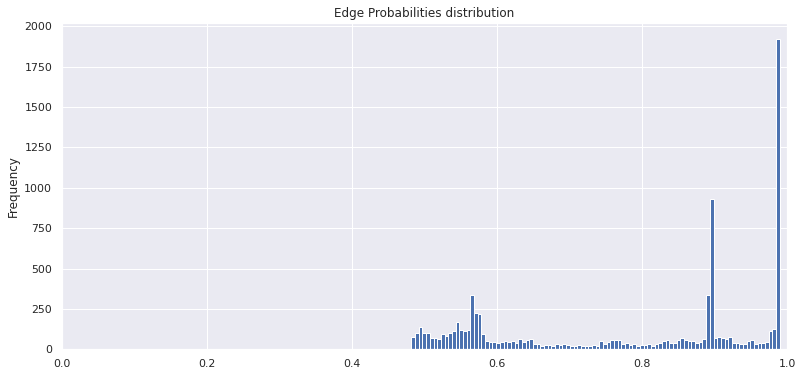

In [9]:
collins_df["probability"].plot.hist(title="Edge Probabilities distribution", bins=100, xlim=[0,1]);

In [11]:
# Create graph
G = nx.from_pandas_edgelist(df=collins_df, source='src', target='dst', edge_attr="probability")

In [12]:
# Print graph properties
print(f" Number of nodes: {G.number_of_nodes()}")
print(f" Number of edges: {G.number_of_edges()}")
print(f" Is directed?: {G.is_directed()}")

 Number of nodes: 1622
 Number of edges: 9074
 Is directed?: False


In [13]:
# list(G.nodes)

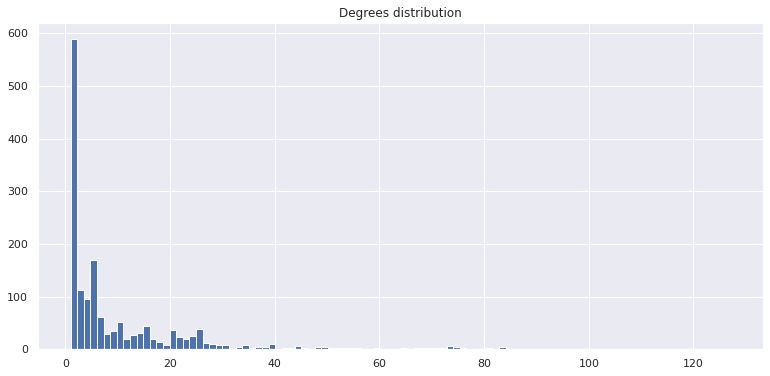

In [14]:
# Plot degree distribution
plt.hist(dict(G.degree()).values(), bins=100)
plt.title("Degrees distribution");

In [16]:
# Plot graph
# nx.draw(G)

In [18]:
# nx.draw_spring(G, node_size=100, node_color="#00C98D", with_labels=False)

# Facebook datasets

In [96]:
# Load datasets
artist_edges_df = pd.read_csv("../input/gemsec_facebook_dataset/artist_edges.csv")

In [97]:
artist_edges_df.head()

,node_1,node_2
0,0,1794
1,0,3102
2,0,16645
3,0,23490
4,0,42128


In [98]:
# Number of edges
artist_edges_df.shape

(819306, 2)

In [99]:
# Number of nodes
len(np.unique(np.hstack([artist_edges_df["node_1"].values, artist_edges_df["node_2"].values])))

50515

**Artist Dataset**
- Number of edges : 50,515
- Number of nodes : 819,306

**Probability distributions**

1. Uniform
2. Normal
3. Power-Law

In [100]:
## 1. Uniform
artist_edges_df["probability"] = np.random.uniform(0,1, size=len(artist_edges_df))

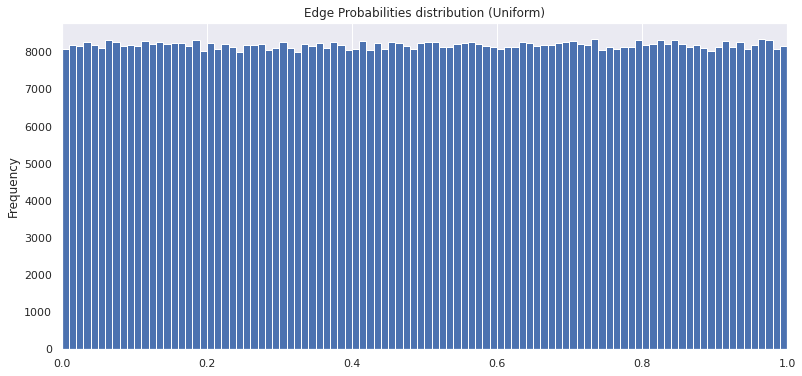

In [101]:
(artist_edges_df["probability"]
 .plot
 .hist(title="Edge Probabilities distribution (Uniform)", bins=100, xlim=[0,1]));

In [102]:
# Save dataset
artist_edges_df.to_csv("../input/artists_uniform.csv", index=False, header=False)

In [103]:
## 2. Normal
probs = np.random.normal(0.5, 0.10, size=len(artist_edges_df))
probs[probs<0]=0
probs[probs>1]=0

artist_edges_df["probability"] = probs

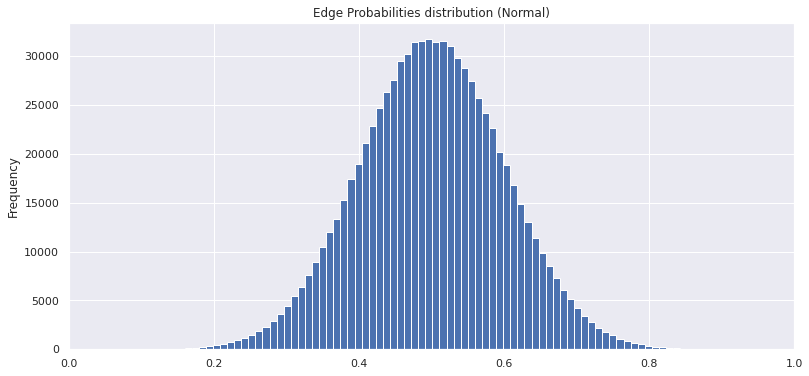

In [104]:
(artist_edges_df["probability"]
 .plot
 .hist(title="Edge Probabilities distribution (Normal)", bins=100, xlim=[0,1]));

In [105]:
# Save dataset
artist_edges_df.to_csv("../input/artists_normal.csv", index=False, header=False)

In [106]:
## 3. Power Law
probs = np.random.power(0.7, size=len(artist_edges_df))
probs[probs<0]=0
probs[probs>1]=0

artist_edges_df["probability"] = probs

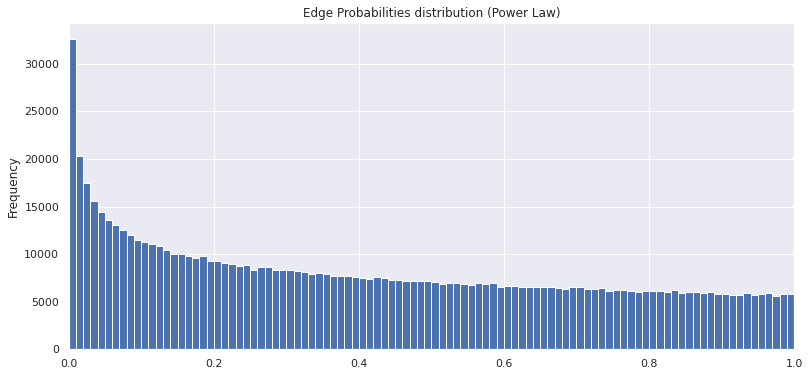

In [107]:
(artist_edges_df["probability"]
 .plot
 .hist(title="Edge Probabilities distribution (Power Law)", bins=100, xlim=[0,1]));

In [108]:
# Save dataset
artist_edges_df.to_csv("../input/artists_power_law.csv", index=False, header=False)

# Experiment results

In [110]:
import plotly.express as px

In [111]:
# experiments_df = pd.read_csv("../experiments.csv")
experiments_df = experiments_df = pd.read_csv("../experiments_collins.csv")

In [121]:
experiments_df.head()

,script,cores,dataset,k,time
0,src/graphframe_bs.py,1,collins,10,30.588037
1,src/graphframe_bs.py,1,collins,100,31.380233
2,src/graphframe_bs.py,1,collins,1000,29.276919
3,src/graphframe_bs.py,2,collins,10,24.484285
4,src/graphframe_bs.py,2,collins,100,22.833561


In [128]:
fig = px.scatter(experiments_df,
                 x="k",
                 y="time",
                 log_x=True,
                 color="script",
                 facet_col="cores")

fig.update_layout(
    title=f"Effect of 'number of cores' x 'k' x 'algorithm' in Time for the collins dataset",
)
    
fig.show()